Going back to your original idea of recommending airlines to travel during the Christmas period, 
- If you train a model to predict if there’ll be a delay on the January to September dataset, 
- then for December you can predict which flights will be delayed, 
- rank them and recommend the best airlines

In [2]:
# In this shell we import needed packages

import pandas as pd
import numpy as np

In [3]:
# Checking data we have

flights_data = pd.read_csv('flights.csv', low_memory=False)
flights_data.head().T

,0,1,2,3,4
YEAR,2015,2015,2015,2015,2015
MONTH,1,1,1,1,1
DAY,1,1,1,1,1
DAY_OF_WEEK,4,4,4,4,4
AIRLINE,AS,AA,US,AA,AS
FLIGHT_NUMBER,98,2336,840,258,135
TAIL_NUMBER,N407AS,N3KUAA,N171US,N3HYAA,N527AS
ORIGIN_AIRPORT,ANC,LAX,SFO,LAX,SEA
DESTINATION_AIRPORT,SEA,PBI,CLT,MIA,ANC
SCHEDULED_DEPARTURE,5,10,20,20,25


In [4]:
# Checking data types

flights_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5819079 entries, 0 to 5819078
Data columns (total 31 columns):
 #   Column               Dtype  
---  ------               -----  
 0   YEAR                 int64  
 1   MONTH                int64  
 2   DAY                  int64  
 3   DAY_OF_WEEK          int64  
 4   AIRLINE              object 
 5   FLIGHT_NUMBER        int64  
 6   TAIL_NUMBER          object 
 7   ORIGIN_AIRPORT       object 
 8   DESTINATION_AIRPORT  object 
 9   SCHEDULED_DEPARTURE  int64  
 10  DEPARTURE_TIME       float64
 11  DEPARTURE_DELAY      float64
 12  TAXI_OUT             float64
 13  WHEELS_OFF           float64
 14  SCHEDULED_TIME       float64
 15  ELAPSED_TIME         float64
 16  AIR_TIME             float64
 17  DISTANCE             int64  
 18  WHEELS_ON            float64
 19  TAXI_IN              float64
 20  SCHEDULED_ARRIVAL    int64  
 21  ARRIVAL_TIME         float64
 22  ARRIVAL_DELAY        float64
 23  DIVERTED             int64  
 24

In [5]:
# Checking how big is our dataset

flights_data.shape

(5819079, 31)

In [6]:
# Good to read, what kind of columns we have

flights_data.columns

Index(['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER',
       'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT',
       'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE',
       'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME',
       'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED', 'CANCELLATION_REASON',
       'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY',
       'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY'],
      dtype='object')

In [7]:
# Checking how many flights are cancelled in given dataset.

flights_data.CANCELLED.sum()

89884

In [8]:
# We decided that we don't need data about cancelled flights
# For dropping we find and store what flights are cancelled, and we need their indexes.

cancelled_flights = flights_data[flights_data['CANCELLED'] == 1].index

In [9]:
# We permanently delete unnecessary rows, using drop method. 

flights_data.drop(cancelled_flights, inplace=True)

In [10]:
# Using shape method to check how much data remained 

flights_data.shape

(5729195, 31)

In [11]:
# Checking how many flights are diverted

flights_data.DIVERTED.sum()

15187

In [12]:
# We decided that for our model we don't want data about flights that didn't arrive to destination after flights were diverted

flights_data.drop((flights_data[flights_data['ARRIVAL_TIME'].isnull() & flights_data['DIVERTED'] == 1]).index, inplace=True)

In [13]:
# Just checking how much data I have left

flights_data.shape

(5726566, 31)

In [14]:
# Checking what columns we have

flights_data.columns

Index(['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER',
       'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT',
       'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE',
       'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME',
       'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED', 'CANCELLATION_REASON',
       'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY',
       'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY'],
      dtype='object')

In [15]:
# Deciding what columns we don't need for our model

drop_columns = ['TAXI_OUT', 'WHEELS_OFF', 'WHEELS_ON', 'TAXI_IN', 'CANCELLED', 'CANCELLATION_REASON', 'DIVERTED', 'TAIL_NUMBER']

In [16]:
flights_data.drop(drop_columns, axis=1, inplace=True)

In [17]:
flights_data.shape

(5726566, 23)

In [18]:
flights_data.sort_values(['MONTH', 'DAY'], ascending=(True, True), inplace=True)

In [19]:
len(flights_data)

5726566

In [20]:
sample_flights_data = flights_data[0:len(flights_data.index):10]
sample_flights_data.reset_index(inplace=True)
sample_flights_data.drop('index', axis=1, inplace=True)
sample_flights_data.head().T

C:\Users\merli\AppData\Local\Temp\ipykernel_12492\2885938025.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample_flights_data.drop('index', axis=1, inplace=True)


,0,1,2,3,4
YEAR,2015,2015,2015,2015,2015
MONTH,1,1,1,1,1
DAY,1,1,1,1,1
DAY_OF_WEEK,4,4,4,4,4
AIRLINE,AS,DL,NK,NK,NK
FLIGHT_NUMBER,98,2336,520,168,972
ORIGIN_AIRPORT,ANC,DEN,LAS,PHX,PHX
DESTINATION_AIRPORT,SEA,ATL,MCI,ORD,DFW
SCHEDULED_DEPARTURE,5,30,55,125,159
DEPARTURE_TIME,2354.0,24.0,120.0,237.0,158.0


In [21]:
# sample_flights_data.to_csv('modified_data.csv', index=False)

In [22]:
sample_flights_data.AIRLINE.unique()

array(['AS', 'DL', 'NK', 'B6', 'HA', 'US', 'UA', 'OO', 'EV', 'AA', 'WN',
       'MQ', 'F9', 'VX'], dtype=object)

- If flight delays more than 15 minutes , then it is considered delay, and there is valid reason for that
- if arrival delay value is positive then flight delays

In [23]:
#target_airline = flights_data.pop('AIRLINE')
#target_airline

In [24]:
sample_flights_data[sample_flights_data['ARRIVAL_DELAY'] > 15.0]


,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,...,AIR_TIME,DISTANCE,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
3,2015,1,1,4,NK,168,PHX,ORD,125,237.0,...,156.0,1440,549,632.0,43.0,43.0,0.0,0.0,0.0,0.0
5,2015,1,1,4,B6,2134,SJU,MCO,400,535.0,...,163.0,1189,605,730.0,85.0,0.0,0.0,85.0,0.0,0.0
7,2015,1,1,4,US,425,PDX,PHX,520,620.0,...,132.0,1009,850,950.0,60.0,0.0,0.0,60.0,0.0,0.0
13,2015,1,1,4,UA,507,CLE,IAH,550,629.0,...,170.0,1091,804,847.0,43.0,4.0,0.0,39.0,0.0,0.0
15,2015,1,1,4,AA,1094,SEA,DFW,555,555.0,...,216.0,1660,1150,1206.0,16.0,16.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
572593,2015,12,31,4,B6,694,FLL,BWI,2035,2147.0,...,116.0,925,2300,12.0,72.0,0.0,0.0,72.0,0.0,0.0
572603,2015,12,31,4,B6,749,DCA,TPA,2055,2128.0,...,119.0,814,2321,2346.0,25.0,0.0,0.0,8.0,17.0,0.0
572604,2015,12,31,4,B6,2080,FLL,DCA,2059,2125.0,...,118.0,899,2318,2341.0,23.0,0.0,0.0,23.0,0.0,0.0
572619,2015,12,31,4,AA,1391,MIA,DFW,2139,2232.0,...,163.0,1121,4,36.0,32.0,0.0,0.0,32.0,0.0,0.0


In [25]:
"""
# Deriving new colum from single column
df["arrival_delay_l15"] = df.ARRIVAL_DELAY.apply(lambda row: 0 if row < 15 else 1)

# Deriving new colum from multiple columns
df["arrival_delay_l15_q1"] = df.apply(
    lambda row: 1 if (row.ARRIVAL_DELAY > 15) & (row.month <= 3) else 0,
    axis=1
)

# ONE-hot encode list of columns
col_list = ["ORIGIN_AIRPORT", "DESTINATION_AIRPORT"]
df_ohe = pd.get_dummies(df, columns=col_list)

"""

'\n# Deriving new colum from single column\ndf["arrival_delay_l15"] = df.ARRIVAL_DELAY.apply(lambda row: 0 if row < 15 else 1)\n\n# Deriving new colum from multiple columns\ndf["arrival_delay_l15_q1"] = df.apply(\n    lambda row: 1 if (row.ARRIVAL_DELAY > 15) & (row.month <= 3) else 0,\n    axis=1\n)\n\n# ONE-hot encode list of columns\ncol_list = ["ORIGIN_AIRPORT", "DESTINATION_AIRPORT"]\ndf_ohe = pd.get_dummies(df, columns=col_list)\n\n'

In [26]:
sample_flights_data['delayed_arrival'] = sample_flights_data.ARRIVAL_DELAY.apply(lambda row: 0 if row < 15 else 1)
sample_flights_data

C:\Users\merli\AppData\Local\Temp\ipykernel_12492\806879267.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample_flights_data['delayed_arrival'] = sample_flights_data.ARRIVAL_DELAY.apply(lambda row: 0 if row < 15 else 1)


,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,...,DISTANCE,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,delayed_arrival
0,2015,1,1,4,AS,98,ANC,SEA,5,2354.0,...,1448,430,408.0,-22.0,NaN,NaN,NaN,NaN,NaN,0
1,2015,1,1,4,DL,2336,DEN,ATL,30,24.0,...,1199,523,453.0,-30.0,NaN,NaN,NaN,NaN,NaN,0
2,2015,1,1,4,NK,520,LAS,MCI,55,120.0,...,1139,537,543.0,6.0,NaN,NaN,NaN,NaN,NaN,0
3,2015,1,1,4,NK,168,PHX,ORD,125,237.0,...,1440,549,632.0,43.0,43.0,0.0,0.0,0.0,0.0,1
4,2015,1,1,4,NK,972,PHX,DFW,159,158.0,...,868,502,503.0,1.0,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
572652,2015,12,31,4,DL,1354,LAX,ATL,2350,16.0,...,1947,654,705.0,11.0,NaN,NaN,NaN,NaN,NaN,0
572653,2015,12,31,4,F9,808,DEN,PBI,2355,2400.0,...,1679,532,520.0,-12.0,NaN,NaN,NaN,NaN,NaN,0
572654,2015,12,31,4,AS,121,SEA,ANC,2355,2355.0,...,1448,251,224.0,-27.0,NaN,NaN,NaN,NaN,NaN,0
572655,2015,12,31,4,UA,516,SEA,IAH,2359,1.0,...,1874,606,600.0,-6.0,NaN,NaN,NaN,NaN,NaN,0


In [27]:
columns_for_one_hot_encoding = ['AIRLINE', 'DESTINATION_AIRPORT', 'ORIGIN_AIRPORT']
type(columns_for_one_hot_encoding)

list

In [28]:
# use method get_dummies

sample_flights_data_ohe = pd.get_dummies(sample_flights_data, columns=columns_for_one_hot_encoding)
sample_flights_data_ohe



,YEAR,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,SCHEDULED_TIME,ELAPSED_TIME,...,ORIGIN_AIRPORT_TYS,ORIGIN_AIRPORT_UST,ORIGIN_AIRPORT_VEL,ORIGIN_AIRPORT_VLD,ORIGIN_AIRPORT_VPS,ORIGIN_AIRPORT_WRG,ORIGIN_AIRPORT_WYS,ORIGIN_AIRPORT_XNA,ORIGIN_AIRPORT_YAK,ORIGIN_AIRPORT_YUM
0,2015,1,1,4,98,5,2354.0,-11.0,205.0,194.0,...,0,0,0,0,0,0,0,0,0,0
1,2015,1,1,4,2336,30,24.0,-6.0,173.0,149.0,...,0,0,0,0,0,0,0,0,0,0
2,2015,1,1,4,520,55,120.0,25.0,162.0,143.0,...,0,0,0,0,0,0,0,0,0,0
3,2015,1,1,4,168,125,237.0,72.0,204.0,175.0,...,0,0,0,0,0,0,0,0,0,0
4,2015,1,1,4,972,159,158.0,-1.0,123.0,125.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
572652,2015,12,31,4,1354,2350,16.0,26.0,244.0,229.0,...,0,0,0,0,0,0,0,0,0,0
572653,2015,12,31,4,808,2355,2400.0,5.0,217.0,200.0,...,0,0,0,0,0,0,0,0,0,0
572654,2015,12,31,4,121,2355,2355.0,0.0,236.0,209.0,...,0,0,0,0,0,0,0,0,0,0
572655,2015,12,31,4,516,2359,1.0,2.0,247.0,239.0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
sample_flights_data.DESTINATION_AIRPORT.nunique()

622

In [30]:
sample_flights_data.columns

Index(['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER',
       'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'SCHEDULED_DEPARTURE',
       'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'SCHEDULED_TIME', 'ELAPSED_TIME',
       'AIR_TIME', 'DISTANCE', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME',
       'ARRIVAL_DELAY', 'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY',
       'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY', 'delayed_arrival'],
      dtype='object')

In [31]:
sample_flights_data.isnull().sum()

YEAR                        0
MONTH                       0
DAY                         0
DAY_OF_WEEK                 0
AIRLINE                     0
FLIGHT_NUMBER               0
ORIGIN_AIRPORT              0
DESTINATION_AIRPORT         0
SCHEDULED_DEPARTURE         0
DEPARTURE_TIME              0
DEPARTURE_DELAY             0
SCHEDULED_TIME              0
ELAPSED_TIME             1272
AIR_TIME                 1272
DISTANCE                    0
SCHEDULED_ARRIVAL           0
ARRIVAL_TIME                0
ARRIVAL_DELAY            1272
AIR_SYSTEM_DELAY       466520
SECURITY_DELAY         466520
AIRLINE_DELAY          466520
LATE_AIRCRAFT_DELAY    466520
WEATHER_DELAY          466520
delayed_arrival             0
dtype: int64

In [32]:
# Values for training
# January to September included
# 
# Dataset = MONTH >= 1 and MONTH <= 9

# Target value is delayed_arrival
# y_train = 

In [33]:
drop_columns_v2 = ['AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY', 'ELAPSED_TIME', 'AIR_TIME', 'ARRIVAL_DELAY']
sample_flights_data_ohe.drop(drop_columns_v2, axis=1, inplace=True)

Some general ideas for train-val-test split… 

- Train the model with training data, 
- optimise model performance with val and leave the test set for for the main cases you want to evaluate in this case, 
- December or the Christmas season


In [34]:
data_for_training = sample_flights_data_ohe[(sample_flights_data_ohe['MONTH'] >= 1) & (sample_flights_data_ohe['MONTH'] <= 9)]
data_for_validation = sample_flights_data_ohe[(sample_flights_data_ohe['MONTH'] >= 10) & (sample_flights_data_ohe['MONTH'] <= 11)]
data_for_testing = sample_flights_data_ohe[sample_flights_data_ohe['MONTH'] == 12]

In [35]:
X_train = data_for_training.drop(['delayed_arrival'], axis = 1)
y_train = data_for_training['delayed_arrival']

X_val = data_for_validation.drop(['delayed_arrival'], axis = 1)
y_val = data_for_validation['delayed_arrival']

X_test = data_for_testing.drop(['delayed_arrival'], axis = 1)
y_test = data_for_testing['delayed_arrival']

In [36]:
print(data_for_training.shape)
print(data_for_validation.shape)
print(data_for_testing.shape)

(430904, 1275)
(94675, 1275)
(47078, 1275)


- Models
    - Decision Tree
    - Random Forest
    - Neural Networks.

Metrices
- Confusion Matrix: Compute confusion matrix to evaluate the accuracy of a classification.
- Accuracy: 
    - Accuracy classification score.
    - In multilabel classification, this function computes subset accuracy: 
        - the set of labels predicted for a sample must exactly match the corresponding set of labels in y_true.
- Precision: 
    - The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. 
    - The precision is intuitively the ability of the classifier not to label as positive a sample that is negative.
    - The best value is 1 and the worst value is 0.
- roc_auc_score:
    - Compute Area Under the Receiver Operating Characteristic Curve (ROC AUC) from prediction scores.
    - Note: this implementation can be used with binary, multiclass and multilabel classification, but some restrictions apply (see Parameters).

In [37]:
# Import Model packages and metrics

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, precision_score, recall_score, roc_auc_score, classification_report

In [38]:
model_decision_tree = DecisionTreeClassifier(random_state=0)

In [39]:
model_decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [40]:
y_test_predicted_labels = model_decision_tree.predict(X_test)

In [41]:
confusion_matrix(y_test, y_test_predicted_labels)  # (tn, fp, fn, tp)

array([[35592,  1799],
       [ 1809,  7878]], dtype=int64)

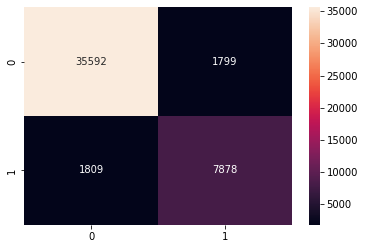

In [42]:
sns.heatmap(confusion_matrix(y_test, y_test_predicted_labels), annot=True, fmt='d')
plt.show()

In [43]:
accuracy_test = accuracy_score(y_test, y_test_predicted_labels)
precision_test = precision_score(y_test, y_test_predicted_labels)
recall_test = recall_score(y_test, y_test_predicted_labels)
f1_test = f1_score(y_test, y_test_predicted_labels)
roc_auc_test = roc_auc_score(y_test, y_test_predicted_labels)


print(f'Accuracy: {accuracy_test}')
print(f'Precision: {precision_test}')
print(f'Recall: {recall_test}')
print(f'F1-Score: {f1_test}')
print(f'Roc_Auc_score: {roc_auc_test}')

Accuracy: 0.9233612302986532
Precision: 0.8140952774620234
Recall: 0.8132548776711056
F1-Score: 0.8136748605659988
Roc_Auc_score: 0.8825708476772527


In [44]:

print(classification_report(y_test, y_test_predicted_labels))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95     37391
           1       0.81      0.81      0.81      9687

    accuracy                           0.92     47078
   macro avg       0.88      0.88      0.88     47078
weighted avg       0.92      0.92      0.92     47078



In [45]:
model_random_forest = RandomForestClassifier(n_estimators=100, random_state=0)

In [46]:
model_random_forest.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [47]:
y_pred_random_forest = model_random_forest.predict(X_test)

In [48]:
confusion_matrix(y_test, y_pred_random_forest)

array([[36803,   588],
       [ 2867,  6820]], dtype=int64)

In [49]:
accuracy_test = accuracy_score(y_test, y_pred_random_forest)
precision_test = precision_score(y_test, y_pred_random_forest)
recall_test = recall_score(y_test, y_pred_random_forest)
f1_test = f1_score(y_test, y_pred_random_forest)
roc_auc_test = roc_auc_score(y_test, y_pred_random_forest)


print(f'Accuracy: {accuracy_test}')
print(f'Precision: {precision_test}')
print(f'Recall: {recall_test}')
print(f'F1-Score: {f1_test}')
print(f'Roc_Auc_score: {roc_auc_test}')

Accuracy: 0.9266111559539487
Precision: 0.9206263498920086
Recall: 0.7040363373593476
F1-Score: 0.7978941210880375
Roc_Auc_score: 0.8441553139820192


# Neural Network - MLPClassifier


In [50]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report

In [51]:
model_mlp_classifier = MLPClassifier(
    hidden_layer_sizes=(10, 20),
    activation='relu',
    solver='adam',
    random_state=42,
    early_stopping=True,
    max_iter=300,
    batch_size=32
)
model_mlp_classifier.fit(X_train, y_train)

c:\Users\merli\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
c:\Users\merli\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
c:\Users\merli\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
c:\Users\merli\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
c:\Users\merli\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier wa

MLPClassifier(batch_size=32, early_stopping=True, hidden_layer_sizes=(10, 20),
              max_iter=300, random_state=42)

In [52]:
y_pred_mlp = model_mlp_classifier.predict(X_test)

In [53]:
y_pred_mpl_validation = model_mlp_classifier.predict(X_val)

In [71]:
# MLP Classifier model report
roc_auc_test = roc_auc_score(y_test, y_pred_mlp)

print('MLP Classifier report for testing data:')
print(classification_report(y_test, y_pred_mlp))
print(f'Roc_Auc_score_test: {roc_auc_test}')

roc_auc_val = roc_auc_score(y_val, y_pred_mpl_validation)
print('\nMLP Classifier report for validation data:')
print(classification_report(y_val, y_pred_mpl_validation))
print(f'Roc_Auc_score_validation: {roc_auc_val}')

MLP Classifier report for testing data:
              precision    recall  f1-score   support

           0       0.93      0.98      0.95     37391
           1       0.90      0.71      0.80      9687

    accuracy                           0.93     47078
   macro avg       0.92      0.85      0.88     47078
weighted avg       0.92      0.93      0.92     47078

Roc_Auc_score_test: 0.8463169724478005

MLP Classifier report for validation data:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97     81504
           1       0.89      0.68      0.77     13171

    accuracy                           0.94     94675
   macro avg       0.92      0.83      0.87     94675
weighted avg       0.94      0.94      0.94     94675

Roc_Auc_score_validation: 0.8328919232035785


In [92]:
# Decision Tree Classifier model report

roc_auc_test = roc_auc_score(y_test, y_test_predicted_labels)

print('Decisiom Tree Classifier report for testing data:')
print(classification_report(y_test, y_test_predicted_labels))
print(f'Roc_Auc_score_test: {roc_auc_test}')

Decisiom Tree Classifier report for testing data:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95     37391
           1       0.81      0.81      0.81      9687

    accuracy                           0.92     47078
   macro avg       0.88      0.88      0.88     47078
weighted avg       0.92      0.92      0.92     47078

Roc_Auc_score_test: 0.8825708476772527


In [93]:
# Random FOrest model report

roc_auc_test = roc_auc_score(y_test, y_pred_random_forest)

print('Random Forest Classifier report for testing data:')
print(classification_report(y_test, y_pred_random_forest))
print(f'Roc_Auc_score_test: {roc_auc_test}')

Random Forest Classifier report for testing data:
              precision    recall  f1-score   support

           0       0.93      0.98      0.96     37391
           1       0.92      0.70      0.80      9687

    accuracy                           0.93     47078
   macro avg       0.92      0.84      0.88     47078
weighted avg       0.93      0.93      0.92     47078

Roc_Auc_score_test: 0.8441553139820192


## Example data for MLP Classifier Model

- MONTH = 4
- ORIGIN_AIRPORT = ABI
- DESTINATION_AIRPORT = BLI

In [100]:
# Example flight
month_example = 12
day_of_week_example = 4
origin_airport_example = 'ORIGIN_AIRPORT_ABI'

example_flight_data = sample_flights_data_ohe.loc[(sample_flights_data_ohe['MONTH'] == month_example) 
                                                & (sample_flights_data_ohe[origin_airport_example] == 1)
                                                & (sample_flights_data_ohe['DAY_OF_WEEK'] == day_of_week_example)]

                        
                                        

In [101]:
example_flight_data

,YEAR,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,SCHEDULED_TIME,DISTANCE,...,ORIGIN_AIRPORT_TYS,ORIGIN_AIRPORT_UST,ORIGIN_AIRPORT_VEL,ORIGIN_AIRPORT_VLD,ORIGIN_AIRPORT_VPS,ORIGIN_AIRPORT_WRG,ORIGIN_AIRPORT_WYS,ORIGIN_AIRPORT_XNA,ORIGIN_AIRPORT_YAK,ORIGIN_AIRPORT_YUM
528744,2015,12,3,4,3431,530,522.0,-8.0,50.0,158,...,0,0,0,0,0,0,0,0,0,0
551604,2015,12,17,4,3297,2145,2133.0,-12.0,60.0,158,...,0,0,0,0,0,0,0,0,0,0
562098,2015,12,24,4,3354,1508,1454.0,-14.0,60.0,158,...,0,0,0,0,0,0,0,0,0,0
562346,2015,12,24,4,3441,1824,1834.0,10.0,60.0,158,...,0,0,0,0,0,0,0,0,0,0
572226,2015,12,31,4,3354,1508,1509.0,1.0,60.0,158,...,0,0,0,0,0,0,0,0,0,0
572477,2015,12,31,4,3441,1824,1814.0,-10.0,60.0,158,...,0,0,0,0,0,0,0,0,0,0


In [102]:
X_example = example_flight_data.drop(['delayed_arrival'], axis = 1)
y_example = example_flight_data['delayed_arrival']

In [103]:
example_flight_data.shape

(6, 1275)

In [104]:
y_example

528744    1
551604    0
562098    0
562346    1
572226    0
572477    0
Name: delayed_arrival, dtype: int64

In [105]:
y_pred_example = model_mlp_classifier.predict(X_example)
y_pred_example

array([0, 0, 0, 0, 0, 0], dtype=int64)

In [106]:
print('Example Flight Model Performance')
print(classification_report(y_example, y_pred_example))

Example Flight Model Performance
              precision    recall  f1-score   support

           0       0.67      1.00      0.80         4
           1       0.00      0.00      0.00         2

    accuracy                           0.67         6
   macro avg       0.33      0.50      0.40         6
weighted avg       0.44      0.67      0.53         6



c:\Users\merli\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\merli\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\merli\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

In [107]:
airline = pd.merge(example_flight_data, flights_data, how='inner', left_index=True, right_index=True)

In [108]:
type(airline)

pandas.core.frame.DataFrame

In [109]:
print("Recommends airlines, that didn't arrive late more than 15 minutes: ")
airline['AIRLINE'].loc[airline['delayed_arrival'] == 0]

Recommends airlines, that didn't arrive late more than 15 minutes: 


551604    OO
562098    UA
572226    DL
572477    AS
Name: AIRLINE, dtype: object